Завдання 1

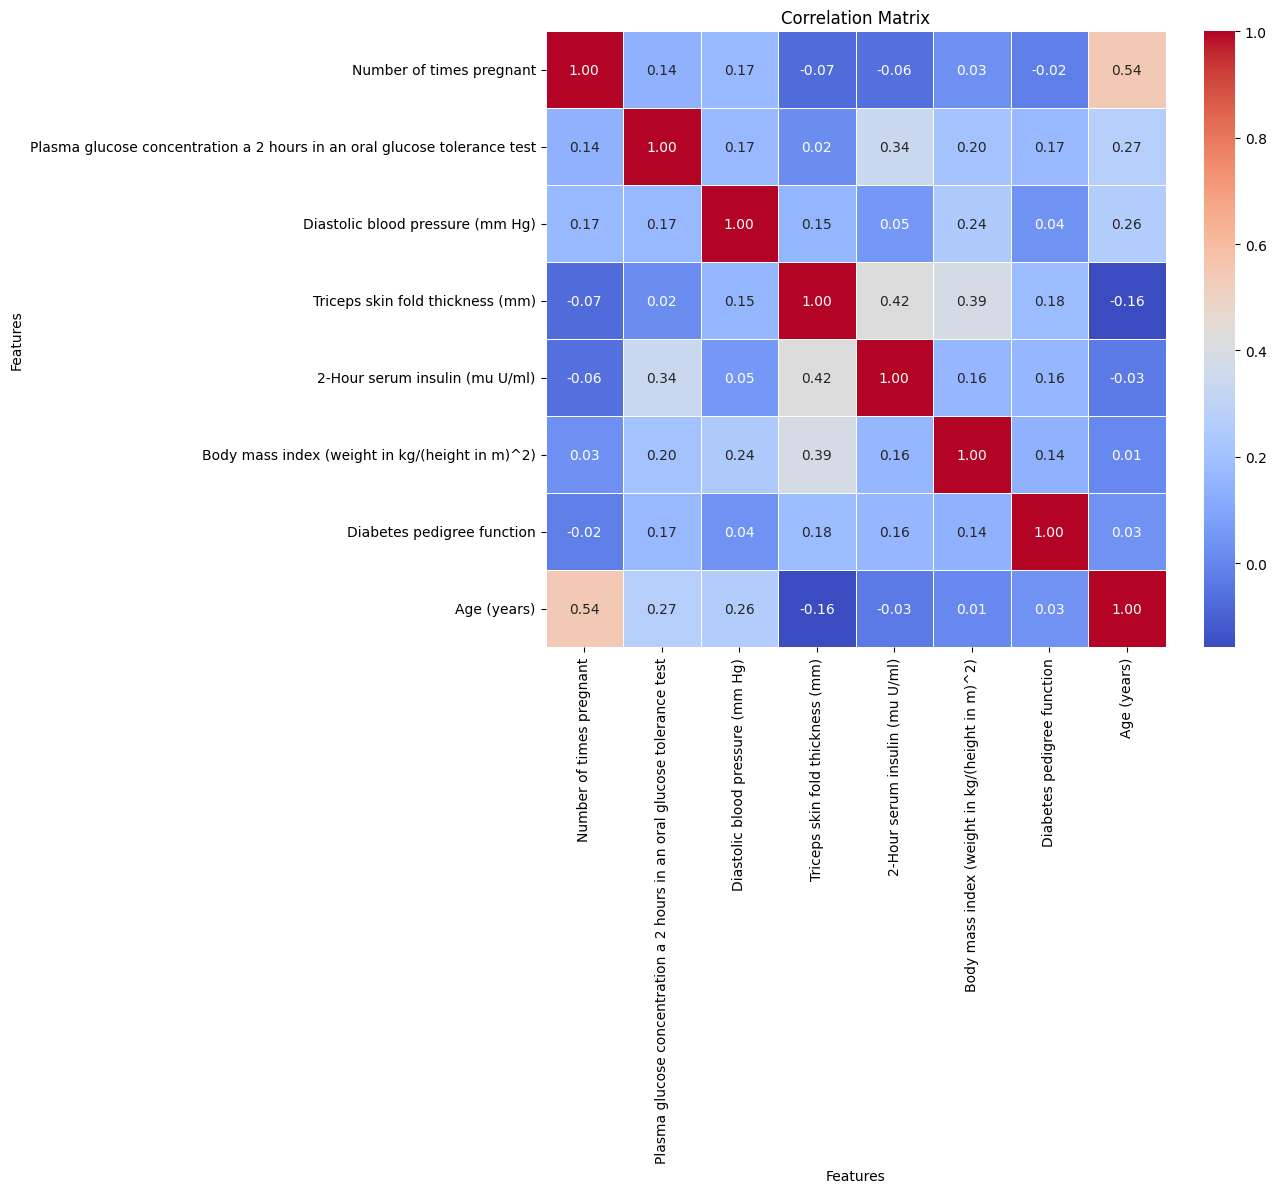

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження датасету
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable (0 or 1)"
]
dataset = pd.read_csv(url, header=None, names=column_names)

# Розділення датасету на ознаки та цільову змінну
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Поділ даних на тренувальну і валідаційну вибірки (70/30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормалізація даних
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Побудова кореляційної матриці
correlation_matrix = pd.DataFrame(X_train_normalized, columns=column_names[:-1]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Клас моделі глибокої нейронної мережі
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Параметри моделі
input_size = X_train.shape[1]
hidden_sizes = [64, 128, 256]  # Різні розміри прихованого шару
num_classes = 2  # Кількість класів (хворий/здоровий)

# Навчання моделі для кожного розміру прихованого шару
for hidden_size in hidden_sizes:
    # Ініціалізація моделі
    model = DeepNeuralNetwork(input_size, hidden_size, num_classes)

    # Визначення функції втрат та оптимізатора
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Конвертація даних у тензори PyTorch
    X_train_tensor = torch.FloatTensor(X_train_normalized)
    y_train_tensor = torch.LongTensor(y_train)

    # Навчання моделі
    num_epochs = 350
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass та оптимізація
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Вивід інформації про втрати під час навчання
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Перевірка точності моделі на валідаційній вибірці
    X_val_tensor = torch.FloatTensor(X_val_normalized)
    y_val_tensor = torch.LongTensor(y_val)
    with torch.no_grad():
        outputs = model(X_val_tensor)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = accuracy_score(y_val, predicted.numpy())
        print(f'Accuracy of the model with hidden size {hidden_size} on the validation set: {accuracy:.2f}')


Epoch [10/350], Loss: 0.6688
Epoch [20/350], Loss: 0.6611
Epoch [30/350], Loss: 0.6542
Epoch [40/350], Loss: 0.6458
Epoch [50/350], Loss: 0.6355
Epoch [60/350], Loss: 0.6238
Epoch [70/350], Loss: 0.6111
Epoch [80/350], Loss: 0.5986
Epoch [90/350], Loss: 0.5862
Epoch [100/350], Loss: 0.5743
Epoch [110/350], Loss: 0.5627
Epoch [120/350], Loss: 0.5518
Epoch [130/350], Loss: 0.5414
Epoch [140/350], Loss: 0.5317
Epoch [150/350], Loss: 0.5226
Epoch [160/350], Loss: 0.5140
Epoch [170/350], Loss: 0.5059
Epoch [180/350], Loss: 0.4982
Epoch [190/350], Loss: 0.4911
Epoch [200/350], Loss: 0.4844
Epoch [210/350], Loss: 0.4783
Epoch [220/350], Loss: 0.4727
Epoch [230/350], Loss: 0.4675
Epoch [240/350], Loss: 0.4626
Epoch [250/350], Loss: 0.4582
Epoch [260/350], Loss: 0.4540
Epoch [270/350], Loss: 0.4504
Epoch [280/350], Loss: 0.4470
Epoch [290/350], Loss: 0.4439
Epoch [300/350], Loss: 0.4411
Epoch [310/350], Loss: 0.4384
Epoch [320/350], Loss: 0.4358
Epoch [330/350], Loss: 0.4336
Epoch [340/350], Lo

In [4]:
from sklearn.metrics import accuracy_score

# Перевірка точності моделі на валідаційній вибірці
X_val_tensor = torch.FloatTensor(X_val_normalized)
y_val_tensor = torch.LongTensor(y_val)
with torch.no_grad():
    outputs = model(X_val_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(y_val, predicted.numpy())
    print(f'Accuracy of the model on the validation set: {accuracy:.2f}')


Accuracy of the model on the validation set: 0.74


In [5]:
dataset[dataset.columns[8]].value_counts()



# датасет не збалансований

Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64